In [1]:
import networkx as nx
import pylab as plt
import pandas as pd
import argparse
import random
import numpy as np
import time

Function to Compute the Energy Consumption

\begin{equation}
  E_{Tx} = 
   k \times E_{elec} + k \times d^2 \times E_{fs} \qquad if \qquad  d< d_0\\
\end{equation}

\begin{equation}
  E_{Tx} =
   k \times E_{elec} + k \times d^4 \times E_{mp} \qquad if \qquad  d> d_0\\
\end{equation}


\begin{equation}
  E_{Rx} = k \times E_{elec} 
\end{equation}


In [2]:
k = 4000  # k represent the number of bytes actually it is 500 bytes
Eelec = 50*10**(-9)  #  Eelec represents the electronic energy consumption (50nJ/bit)
Efs = 10*10**(-12)  # Eamp represents the Transmit amplifier (10pJ/bit/m^2)
Emp = 0.0013*10**(-12)  # Eamp represents the Transmit amplifier (0.0013pJ/bit/m^4)
d0 = 87

ERex = k*Eelec  # ERex represents the energy required for receiving data



def ETx(d):
    if d < d0:
        return k*Eelec + k*d**2*Efs
    else:
        return k*Eelec + k*d**4*Emp



In [3]:
import time

In [4]:
def AstarEnergy(Graph):
    list_nodes = list(Graph.nodes())
    activenodes = list_nodes[1:]
    random.seed(237)
    #S = listnodes[1]
    D = list_nodes[0]
    # This list contains the sum of the transmission energy in all the possible paths
    Ex = []
    t = []
    ListeEnergy = []
    start = time.time()
    for k in range(1000):

        S = random.choice(activenodes)
        liste = nx.astar_path(Graph, S, D, weight = 'weight' ) 
        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste)):
            if i == 0:
                Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
            elif i!=0 and i!= len(liste) - 1:
                Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']) + ERex)
            Energysum = sum(Energy)

        ListeEnergy.append(Energysum)
        r = time.time() - start
        t.append(r) 
        #Ex.append(ListeEnergy)

        #plt.plot(ListeEnergy)
        #plt.show()
    final = time.time() - start
    return sum(ListeEnergy) , final, t, ListeEnergy, np.mean(ListeEnergy), np.std(ListeEnergy), (np.std(ListeEnergy)/np.mean(ListeEnergy))*100           

In [5]:
G20 = nx.read_gml('Graph21.gml')

In [6]:
Astar = AstarEnergy(G20)

In [4]:
# def AstarEnergy(Graph):
#   list_nodes = list(Graph.nodes())
#   random.seed(237)
#   #S = listnodes[1]
#   D = list_nodes[0]
#   ListeEnergy = [] # This list contains the sum of the transmission energy in all the possible paths
#   for k in range(100):
#     S = random.choice(list_nodes)
#     if S != D:
#       liste = nx.astar_path(Graph, S, D, weight = 'weight' ) 
#       Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

#       for i in range(len(liste)):
#         if i == 0:
#           Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
#           Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
#         elif i!=0 and i!= len(liste) - 1:
#           Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
#           Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']))
#       Energysum = sum(Energy)
#     else:
#       continue
#     ListeEnergy.append(Energysum) 

#   plt.plot(ListeEnergy)
#   plt.show()

#   return ListeEnergy           

In [8]:
AstarEnergy(G20)

(1.217658104050397,
 0.3008077144622803,
 [0.0,
  0.0,
  0.0,
  0.0010001659393310547,
  0.0010001659393310547,
  0.0010001659393310547,
  0.0010001659393310547,
  0.0019989013671875,
  0.0019989013671875,
  0.0019989013671875,
  0.0029976367950439453,
  0.0029976367950439453,
  0.0029976367950439453,
  0.003978252410888672,
  0.003978252410888672,
  0.003978252410888672,
  0.003978252410888672,
  0.004974842071533203,
  0.004974842071533203,
  0.0059735774993896484,
  0.006977081298828125,
  0.006977081298828125,
  0.006977081298828125,
  0.007995367050170898,
  0.007995367050170898,
  0.008994340896606445,
  0.008994340896606445,
  0.0099945068359375,
  0.010994195938110352,
  0.011993169784545898,
  0.011993169784545898,
  0.012992382049560547,
  0.013991832733154297,
  0.014991044998168945,
  0.015969038009643555,
  0.01696920394897461,
  0.01696920394897461,
  0.017969846725463867,
  0.018967866897583008,
  0.018967866897583008,
  0.019966602325439453,
  0.019966602325439453,
  0.

## Let's do the same with Dijstra Algorithm

In [9]:
G20  = nx.read_gml('Graph21.gml')

In [10]:
def DijstraEnergy(Graph):
    list_nodes = list(Graph.nodes())
    activenodes = list_nodes[1:]
    random.seed(237)
    #S = listnodes[1]
    D = list_nodes[0]
    # This list contains the sum of the transmission energy in all the possible paths
    Ex = []
    t = []
    ListeEnergy = []
    start = time.time()
    for k in range(1000):

        S = random.choice(activenodes)
        liste = nx.single_source_dijkstra(Graph, S, D, weight='weight')[1] 
        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste)):
            if i == 0:
                Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
            elif i!=0 and i!= len(liste) - 1:
                Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']) + ERex)
            Energysum = sum(Energy)

        ListeEnergy.append(Energysum)
        r = time.time() - start
        t.append(r) 
        #Ex.append(ListeEnergy)

        #plt.plot(ListeEnergy)
        #plt.show()
    final = time.time() - start
    return sum(ListeEnergy), final, t, ListeEnergy, np.mean(ListeEnergy), np.std(ListeEnergy), (np.std(ListeEnergy)/np.mean(ListeEnergy))*100           

In [11]:
Dijstra = DijstraEnergy(G20)

In [12]:
import random

In [13]:
def compute(Graph, liste):
    ListeEnergy = [] # This list contains the sum of the transmission energy in all the possible paths 
    # l = []
    # for j in liste: # j will go through all the length of our liste of possible paths
    #   if deadNodes(Graph,j) is not None:
    #     l.append(deadNodes(Graph,j))
        
    # liste = [i for i in liste if isFeasible(Graph,i)]### all possible paths according to the energy able to share the information in the network



    for j in range(len(liste)): # j will go through all the length of our liste of possible paths

        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste[j])): # i will go through all the length of one of the possible path

            if i == 0:                   # If the node is the source node, we don't use the ERx                                           # We update the energy of the source node

                Energy.append(ETx(Graph[liste[j][i]][liste[j][i + 1]]['weight']))                                                                # We append the transmission energy in the liste Energy that we have created 

            elif i!=0 and i!= len(liste[j]) - 1:                                                                                            # If the node is a node situated in the transfer path 

                Energy.append(ETx(Graph[liste[j][i]][liste[j][i + 1]]['weight']) + ERex)                                                               # We append the transmission energy in the liste Energy that we have created                                                            # The energy of the destination node remains the same

            Energysum = sum(Energy)                                              # We sum the transmission energy of all the segment of each path 

        ListeEnergy.append(Energysum)                                          # We append the transmission energy of each path
    x = min(ListeEnergy)
    y = ListeEnergy
    return x, y


In [14]:

random.seed(237) # l = []
 
def NewEnergy(Graph):
    listnodes = list(Graph.nodes())
    activenodes = listnodes[1:]
    Ex = []
    t = []
    start = time.time()
    for k in range(1000):
        S = random.choice(activenodes)
        # S = listnodes[1]
        D = listnodes[0]

        paths = nx.all_simple_paths(Graph, source=S, target=D,cutoff=7)
        liste = list(paths)
        x = compute(Graph, liste)[0]
        y = compute(Graph, liste)[1]
        Index = y.index(x)  
        l = liste[Index]

        for i in range(len(l)): # i will go through all the length of one of the possible path

            if i == 0:                   # If the node is the source node, we don't use the ERx

                Graph.nodes[l[i]]["Energy"] -= ETx(Graph[l[i]][l[i + 1]]['weight'])                                             # We update the energy of the source node

            elif i!=0 and i!= len(l) - 1:                                                                                            # If the node is a node situated in the transfer path 

                Graph.nodes[l[i]]["Energy"] = Graph.nodes[l[i]]["Energy"] - ETx(Graph[l[i]][l[i + 1]]['weight']) - ERex   # We update the energy of each node situated in the transfer path

        Ex.append(x)
        r = time.time() - start
        t.append(r)
    final = time.time() - start
    return sum(Ex), final, t, Ex, np.mean(Ex), np.std(Ex), (np.std(Ex)/np.mean(Ex))*100



In [15]:
Method = NewEnergy(G20)

In [45]:
#tAstar = np.cumsum(Astar[2])
EAstar = np.cumsum(Astar[3])
#tDijstra = np.cumsum(Dijstra[2])
EDijstra = np.cumsum(Dijstra[3])
#tMethod = np.cumsum(Method[2])
EMethod = np.cumsum(Method[3])

In [160]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
import matplotlib.pyplot as plt

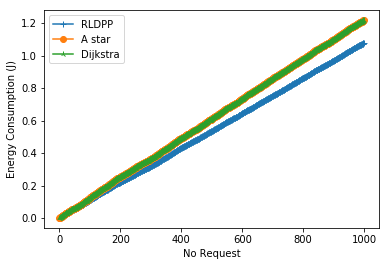

In [49]:
import matplotlib.pyplot as plt
plt.plot(EMethod, marker = '+', label='RLDPP')
plt.plot(EAstar, marker = '', label='A star ')
plt.plot(EDijstra, marker = '2', label='Dijkstra')
#plt.xlim(0, 150)
plt.xlabel('No Request')
plt.ylabel('Energy Consumption (J)')
plt.legend()
#plt.savefig('/content/gdrive/MyDrive/Networkx/Energy.png')
plt.show()

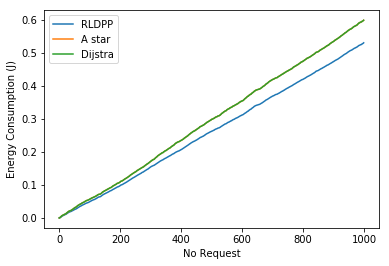

In [267]:
import matplotlib.pyplot as plt
plt.plot(EMethod, label='RLDPP')
plt.plot(EAstar, label='A star ')
plt.plot(EDijstra, label='Dijstra')
#plt.xlim(0, 150)
plt.xlabel('No Request')
plt.ylabel('Energy Consumption (J)')
plt.legend()
#plt.savefig('/content/gdrive/MyDrive/Networkx/Energy.png')
plt.show()

In [36]:
Astar25 = AstarEnergy(G25)

In [37]:
Dijstra25 = DijstraEnergy(G25)

In [38]:
Method25 = NewEnergy(G25)

In [41]:
Astar25[0]

0.4627746799999993

In [42]:
Dijstra25[0]

0.4627746799999993

In [43]:
Method25[0]

0.44168559999999896

In [60]:
EMethod25[-1]

0.44168559999999896

In [49]:
Dijstra25[3]

[0.00068004,
 0.00067332,
 0.00067632,
 0.00028836,
 0.00025184000000000003,
 0.00023364000000000002,
 0.00055188,
 0.00067632,
 0.00030000000000000003,
 0.00047232000000000003,
 0.00040736,
 0.0005402,
 0.00025184000000000003,
 0.00045220000000000004,
 0.00055188,
 0.00067332,
 0.00068004,
 0.00024096000000000002,
 0.00055188,
 0.00068004,
 0.0005384400000000001,
 0.0005384400000000001,
 0.00067332,
 0.00076344,
 0.0008848800000000001,
 0.00067332,
 0.00067332,
 0.00025184000000000003,
 0.00024096000000000002,
 0.00055188,
 0.0005402,
 0.00030000000000000003,
 0.00047232000000000003,
 0.00030000000000000003,
 0.0005384400000000001,
 0.00027056,
 0.00066516,
 0.00076344,
 0.00028836,
 0.00025184000000000003,
 0.00048264,
 0.0005384400000000001,
 0.00028836,
 0.00068004,
 0.00046068000000000004,
 0.00046068000000000004,
 0.00028836,
 0.00048264,
 0.0005384400000000001,
 0.00045220000000000004,
 0.00068004,
 0.00027056,
 0.00027056,
 0.00068004,
 0.0008848800000000001,
 0.00040736,
 0.00

In [39]:
tAstar25 = np.cumsum(Astar25[2])
EAstar25 = np.cumsum(Astar25[3])
tDijstra25 = np.cumsum(Dijstra25[2])
EDijstra25 = np.cumsum(Dijstra25[3])
tMethod25 = np.cumsum(Method25[2])
EMethod25 = np.cumsum(Method25[3])

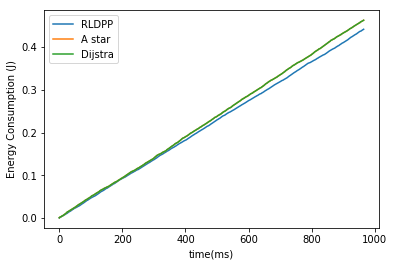

In [62]:
import matplotlib.pyplot as plt
plt.plot(EMethod25, label='RLDPP')
plt.plot(EAstar25, label='A star ')
plt.plot(EDijstra25, label='Dijstra')
#plt.xlim(0, 150)
plt.xlabel('time(ms)')
plt.ylabel('Energy Consumption (J)')
plt.legend()
#plt.savefig('/content/gdrive/MyDrive/Networkx/Energy.png')
plt.show()

Network Topology of the differents graphs used

First Graph

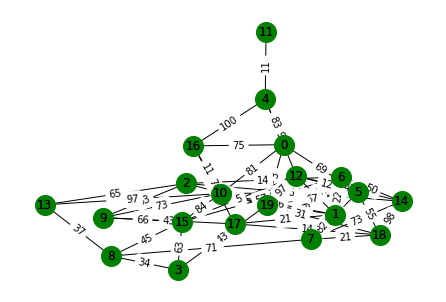

In [97]:
from random import randint
G20 = nx.gnp_random_graph(20, 0.3)
pos = nx.spring_layout(G20)
nx.draw(G20,pos,node_color='green',node_size=400,with_labels=True)
nx.draw_networkx_labels(G20, pos)
nx.set_edge_attributes(G20, {e: {'weight': randint(1, 100)} for e in G20.edges})
nx.set_node_attributes(G20, {e: {'Energy': 2} for e in G20.nodes})
labels = nx.get_edge_attributes(G20, 'weight')
nx.draw_networkx_edge_labels(G20, pos, edge_labels=labels)
#plt.savefig('/content/gdrive/MyDrive/Networkx/network20.png')
plt.show()

In [201]:
N20 = len(G20.nodes())
N20

20

In [202]:
L20 = len(G20.edges())
L20

51

In [188]:
delta20 = nx.diameter(G20)
delta20

3

In [195]:
Avgdeg20 = sum(dict(G20.degree()).values())/float(len(G20))
Avgdeg20

5.1

In [197]:
deg = sorted(dict(G20.degree()).values())
deg
Maxdeg20 = max(deg)
Mindeg20 = min(deg)

In [199]:
print(Maxdeg20, Mindeg20)

9 2


In [200]:
AvgLink = nx.average_shortest_path_length(G20, weight='weigth')
AvgLink

1.9105263157894736

Second Graph

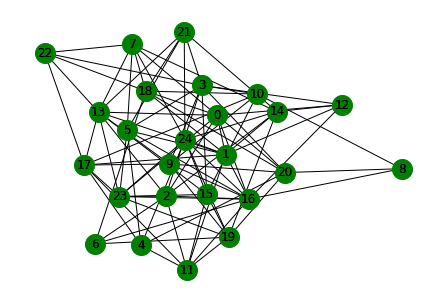

In [35]:
# from random import randint
# G25 = nx.gnp_random_graph(25, 0.3)
# pos = nx.spring_layout(G25)
# nx.draw(G25,pos,node_color='green',node_size=400,with_labels=True)
# nx.draw_networkx_labels(G25, pos)
# nx.set_edge_attributes(G25, {e: {'weight': randint(1, 100)} for e in G25.edges})
# nx.set_node_attributes(G25, {e: {'Energy': 2} for e in G25.nodes})
# labels = nx.get_edge_attributes(G25, 'weight')
# #plt.figure(figsize = (30,30))
# #nx.draw_networkx_edge_labels(G50, pos, edge_labels=labels)
# #plt.savefig('/content/gdrive/MyDrive/Networkx/network50.png')
# plt.show()

Third Graph

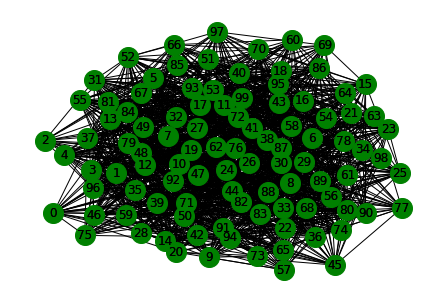

In [30]:
# from random import randint
# G100 = nx.gnp_random_graph(100, 0.3)
# pos = nx.spring_layout(G100)
# nx.draw(G100,pos,node_color='green',node_size=400,with_labels=True)
# nx.draw_networkx_labels(G100, pos)
# nx.set_edge_attributes(G100, {e: {'weight': randint(1, 100)} for e in G100.edges})
# nx.set_node_attributes(G100, {e: {'Energy': 2} for e in G100.nodes})
# labels = nx.get_edge_attributes(G100, 'weight')
# #plt.figure(figsize = (30,30))
# #nx.draw_networkx_edge_labels(G50, pos, edge_labels=labels)
# #plt.savefig('/content/gdrive/MyDrive/Networkx/network100.png')
# plt.show()

In [43]:
Astar20 = AstarEnergy(G20)

In [49]:
Dijstra20 = DijstraEnergy(G20)

In [54]:
New20 = NewEnergy(G20)

In [44]:
MeanAstar20 = Astar20[4]
StdAstar20 = Astar20[5]
PearsonAstar20 = Astar20[6]

In [45]:
MeanAstar20

0.0006870187235049214

In [46]:
StdAstar20

0.00025549418392529675

In [47]:
PearsonAstar20

37.18882399912737

In [50]:
MeanDijstra20 = Dijstra20[4]
StdDijstra20 = Dijstra20[5]
PearsonDijstra20 = Dijstra20[6]

In [51]:
MeanDijstra20 

0.0006870187235049214

In [52]:
StdDijstra20

0.00025549418392529675

In [53]:
PearsonDijstra20

37.18882399912737

In [55]:
MeanNew20 = New20[4]
StdNew20 = New20[5]
PearsonNew20 = New20[6]

In [56]:
MeanNew20

0.0006269636873928721

In [57]:
StdNew20

0.000174655081677009

In [58]:
PearsonNew20

27.85728825911499

In [ ]:
0

In [ ]:
tAstar20 = np.cumsum(Astar20[2])
EAstar20 = np.cumsum(Astar20[3])
tDijstra20 = np.cumsum(Dijstra20[2])
EDijstra20 = np.cumsum(Dijstra20[3])
tNew20 = np.cumsum(New20[2])
ENew20 = np.cumsum(New20[3])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tAstar20, EAstar20, label='A star ')
plt.plot(tDijstra20, EDijstra20, label='Dijstra')
plt.plot(tNew20, ENew20, label='Our Method')
#plt.xlim(0, 300)
plt.xlabel('time(ms)')
plt.ylabel('Energy Consumed')
plt.legend()
#plt.savefig('/content/gdrive/MyDrive/Networkx/Energy.png')
plt.show()

## Network Lifetime

#### A star Algorithm

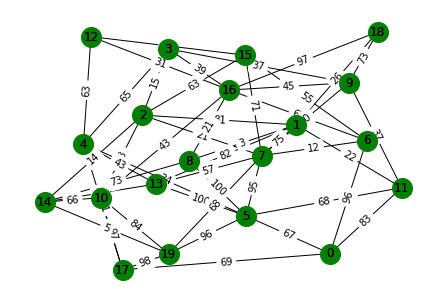

In [141]:

# random.seed(237)
# from random import randint
# G20 = nx.gnp_random_graph(20, 0.3)
# pos = nx.spring_layout(G20)
# nx.draw(G20,pos,node_color='green',node_size=400,with_labels=True)
# nx.draw_networkx_labels(G20, pos)
# nx.set_edge_attributes(G20, {e: {'weight': randint(1, 100)} for e in G20.edges})
# nx.set_node_attributes(G20, {e: {'Energy': 2} for e in G20.nodes})
# labels = nx.get_edge_attributes(G20, 'weight')
# nx.draw_networkx_edge_labels(G20, pos, edge_labels=labels)
# #plt.savefig('/content/gdrive/MyDrive/Networkx/network20.png')
# plt.show()

In [312]:
def AstarEnergyLifetime(Graph):
    list_nodes = list(Graph.nodes())
    activenodes = list_nodes[1:]
    random.seed(237)
    #S = listnodes[1]
    D = list_nodes[0]
    # This list contains the sum of the transmission energy in all the possible paths
    Ex = []
    #t = []
    ListeEnergy = []
    counter = 0
    r = True
    #start = time.time()
    while (len(activenodes) == len(list_nodes) - 1): #r:
        S = random.choice(activenodes)
        liste = nx.astar_path(Graph, S, D, weight = 'weight' ) 
        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste)):
            if i == 0:
                Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
            elif i!=0 and i!= len(liste) - 1:
                Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']))
        Energysum = sum(Energy)
        for m in range(len(activenodes) - 1):
            if Graph.nodes[activenodes[m]]["Energy"] < 0:
                t = activenodes[m]
                activenodes.remove(t)
                #r = False

        ListeEnergy.append(Energysum)
        counter += 1
        #r = time.time() - start
        #t.append(r) 
        #Ex.append(ListeEnergy)

        #plt.plot(ListeEnergy)
        #plt.show()
    #final = time.time() - start
    return sum(ListeEnergy) , activenodes, counter, ListeEnergy#, np.mean(ListeEnergy), np.std(ListeEnergy), (np.std(ListeEnergy)/np.mean(ListeEnergy))*100           

In [391]:
G20 = nx.read_gml('Graph21.gml')

In [393]:
G20.nodes['4']["Energy"]

2

In [394]:
AstarEnergyLifetime(G20)

(5.755485533909142,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19'],
 6550,
 [0.0011129199999999999,
  0.0006416602111999999,
  0.00089528,
  0.0012729002112,
  0.0010650602111999998,
  0.0006416602111999999,
  0.00039044000000000004,
  0.0012729002112,
  0.00092196,
  0.00069492,
  0.0011129199999999999,
  0.0012740602112,
  0.00095404,
  0.00095404,
  0.0011129199999999999,
  0.00073032,
  0.00059528,
  0.0011129199999999999,
  0.0011129199999999999,
  0.0012729002112,
  0.0012740602112,
  0.00069492,
  0.00039044000000000004,
  0.00039044000000000004,
  0.00095404,
  0.0008692400000000001,
  0.00037956000000000003,
  0.00073032,
  0.00089528,
  0.0012729002112,
  0.0009626602111999999,
  0.00095404,
  0.00089528,
  0.00089528,
  0.0009626602111999999,
  0.00095404,
  0.00092196,
  0.0008692400000000001,
  0.0008692400000000001,
  0.00059528,
  0.0008692400000000001,
  0.0011129199999999999,
  0.0

In [402]:
G25 = nx.read_gml('Graph25.gml')

In [403]:
G25.nodes['5']["Energy"]

2

In [404]:
AstarEnergyLifetime(G25)

(5.724287040000475,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24'],
 10388,
 [0.0010345200000000001,
  0.00066452,
  0.00061188,
  0.000249,
  0.00081528,
  0.0008167200000000001,
  0.00020196,
  0.00061188,
  0.00040052,
  0.0004356,
  0.00043172,
  0.00040596,
  0.00081528,
  0.00081444,
  0.00020196,
  0.0006395999999999999,
  0.00066452,
  0.0010345200000000001,
  0.00061592,
  0.00020196,
  0.0010345200000000001,
  0.00020036,
  0.00020036,
  0.00066452,
  0.00024096000000000002,
  0.0006430800000000001,
  0.00066452,
  0.00066452,
  0.00081528,
  0.00061592,
  0.0006395999999999999,
  0.00020196,
  0.00040596,
  0.00040052,
  0.0004356,
  0.00040052,
  0.00020036,
  0.00040296,
  0.00044292,
  0.00024096000000000002,
  0.000249,
  0.00081528,
  0.00060952,
  0.00020036,
  0.000249,
  0.0010345200000000001,
  0.000249,
  0.00060952,
  0.00020036,
  0.0008

In [408]:
G30 = nx.read_gml('Graph30.gml')

In [409]:
G30.nodes['5']["Energy"]

2

In [410]:
AstarEnergyLifetime(G30)

(7.32321683999968,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29'],
 13407,
 [0.00045,
  0.000249,
  0.00066296,
  0.00045392,
  0.00042196000000000003,
  0.00081236,
  0.00041348000000000003,
  0.00044868,
  0.00063796,
  0.00045392,
  0.0008842400000000001,
  0.00021024000000000002,
  0.0005160000000000001,
  0.0006294800000000001,
  0.00041348000000000003,
  0.00066296,
  0.00041636000000000006,
  0.00063796,
  0.0010546000000000002,
  0.000249,
  0.00045,
  0.00054752,
  0.00063796,
  0.00045,
  0.00042452000000000006,
  0.00042452000000000006,
  0.000249,
  0.0006682400000000001,
  0.00061764,
  0.000249,
  0.000249,
  0.00041348000000000003,
  0.00054752,
  0.0010546000000000002,
  0.00063796,
  0.0006294800000000001,
  0.00059792,
  0.0008842400000000001,
  0.00021024000000000002,
  0.0008842400000000001,
  0.0004

#### Dijstra Algorithm

In [321]:
def DijstraEnergyLifetime(Graph):
    list_nodes = list(Graph.nodes())
    activenodes = list_nodes[1:]
    random.seed(237)
    #S = listnodes[1]
    D = list_nodes[0]
    # This list contains the sum of the transmission energy in all the possible paths
    Ex = []
    #t = []
    counter = 0
    ListeEnergy = []
    #start = time.time()
    while(len(activenodes) == len(list_nodes) - 1):

        S = random.choice(activenodes)
        liste = nx.single_source_dijkstra(Graph, S, D, weight='weight')[1] 
        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste)):
            if i == 0:
                Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
            elif i!=0 and i!= len(liste) - 1:
                Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']) + ERex)
        Energysum = sum(Energy)
        for j in range(len(activenodes) - 1):
            if Graph.nodes[activenodes[j]]["Energy"] < 0:
                #t = activenodes[j]
                activenodes.remove(activenodes[j])
            else: 
                continue  

        ListeEnergy.append(Energysum)
        counter += 1
        #r = time.time() - start
        #t.append(r) 
        #Ex.append(ListeEnergy)

        #plt.plot(ListeEnergy)
        #plt.show()
    #final = time.time() - start
    return sum(ListeEnergy) , activenodes, counter, ListeEnergy

In [389]:
G20 = nx.read_gml('Graph21.gml')

In [390]:
DijstraEnergyLifetime(G20)

(7.775085533909613,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19'],
 6550,
 [0.0017129200000000002,
  0.0006416602111999999,
  0.00129528,
  0.0018729002112,
  0.0014650602112,
  0.0006416602111999999,
  0.00039044000000000004,
  0.0018729002112,
  0.00132196,
  0.00089492,
  0.0017129200000000002,
  0.0018740602112,
  0.00135404,
  0.00135404,
  0.0017129200000000002,
  0.00093032,
  0.00079528,
  0.0017129200000000002,
  0.0017129200000000002,
  0.0018729002112,
  0.0018740602112,
  0.00089492,
  0.00039044000000000004,
  0.00039044000000000004,
  0.00135404,
  0.00126924,
  0.00037956000000000003,
  0.00093032,
  0.00129528,
  0.0018729002112,
  0.0011626602112,
  0.00135404,
  0.00129528,
  0.00129528,
  0.0011626602112,
  0.00135404,
  0.00132196,
  0.00126924,
  0.00126924,
  0.00079528,
  0.00126924,
  0.0017129200000000002,
  0.00037956000000000003,
  0.00037956000000000003,
  0.00116266021

In [405]:
G25 = nx.read_gml('Graph25.gml')

In [395]:
G25.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

In [406]:
G25.nodes['5']["Energy"]

2

In [407]:
DijstraEnergyLifetime(G25)

(9.014487039999867,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24'],
 10388,
 [0.0016345200000000002,
  0.00106452,
  0.0010118800000000002,
  0.000249,
  0.0014152799999999999,
  0.00141672,
  0.00020196,
  0.0010118800000000002,
  0.00060052,
  0.0006356,
  0.00063172,
  0.00060596,
  0.0014152799999999999,
  0.00141444,
  0.00020196,
  0.0010396000000000001,
  0.00106452,
  0.0016345200000000002,
  0.00101592,
  0.00020196,
  0.0016345200000000002,
  0.00020036,
  0.00020036,
  0.00106452,
  0.00024096000000000002,
  0.00104308,
  0.00106452,
  0.00106452,
  0.0014152799999999999,
  0.00101592,
  0.0010396000000000001,
  0.00020196,
  0.00060596,
  0.00060052,
  0.0006356,
  0.00060052,
  0.00020036,
  0.00060296,
  0.00064292,
  0.00024096000000000002,
  0.000249,
  0.0014152799999999999,
  0.0010095199999999999,
  0.00020036,
  0.000249,
  0.00163452000000

In [411]:
G30 = nx.read_gml('Graph30.gml')

In [412]:
G30.nodes['5']["Energy"]

2

In [413]:
DijstraEnergyLifetime(G30)

(11.101416840000194,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29'],
 13407,
 [0.00065,
  0.000249,
  0.0010629600000000002,
  0.0006539200000000001,
  0.0006219600000000001,
  0.00121236,
  0.00061348,
  0.00064868,
  0.00103796,
  0.0006539200000000001,
  0.0014842400000000002,
  0.00021024000000000002,
  0.0007160000000000001,
  0.0010294800000000002,
  0.00061348,
  0.0010629600000000002,
  0.00061636,
  0.00103796,
  0.0018546,
  0.000249,
  0.00065,
  0.00074752,
  0.00103796,
  0.00065,
  0.00062452,
  0.00062452,
  0.000249,
  0.00106824,
  0.00081764,
  0.000249,
  0.000249,
  0.00061348,
  0.00074752,
  0.0018546,
  0.00103796,
  0.0010294800000000002,
  0.00079792,
  0.0014842400000000002,
  0.00021024000000000002,
  0.0014842400000000002,
  0.00062452,
  0.0014488400000000003,
  0.0006259200000000001,
  0.00

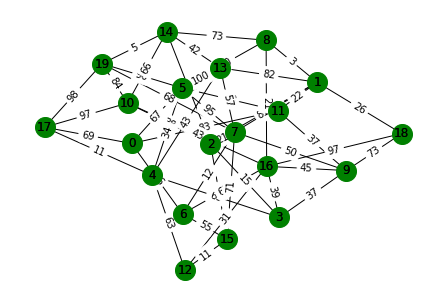

In [306]:
# random.seed(237)
# from random import randint
# G20 = nx.gnp_random_graph(20, 0.3)
# pos = nx.spring_layout(G20)
# nx.draw(G20,pos,node_color='green',node_size=400,with_labels=True)
# nx.draw_networkx_labels(G20, pos)
# nx.set_edge_attributes(G20, {e: {'weight': randint(1, 100)} for e in G20.edges})
# nx.set_node_attributes(G20, {e: {'Energy': 2} for e in G20.nodes})
# labels = nx.get_edge_attributes(G20, 'weight')
# nx.draw_networkx_edge_labels(G20, pos, edge_labels=labels)
# #plt.savefig('/content/gdrive/MyDrive/Networkx/network20.png')
# plt.show()

#### Our Method

In [310]:
nx.write_gml(G20, "Graph21.gml")

In [311]:
G20 = nx.read_gml('Graph21.gml')

In [422]:

random.seed(237) # l = []
 
def NewEnergyLifetime(Graph):
    listnodes = list(Graph.nodes())
    activenodes = listnodes[1:]
    Ex = []
    #t = []
    counter = 0
    #start = time.time()
    while(len(activenodes) == len(listnodes) - 1):
        S = random.choice(activenodes)
        # S = listnodes[1]
        D = listnodes[0]

        paths = nx.all_simple_paths(Graph, source=S, target=D,cutoff=5)
        liste = list(paths)
        x = compute(Graph, liste)[0]
        y = compute(Graph, liste)[1]
        Index = y.index(x)  
        l = liste[Index]

        for i in range(len(l)): # i will go through all the length of one of the possible path

            if i == 0:                   # If the node is the source node, we don't use the ERx

                Graph.nodes[l[i]]["Energy"] -= ETx(Graph[l[i]][l[i + 1]]['weight'])                                             # We update the energy of the source node

            elif i!=0 and i!= len(l) - 1:                                                                                            # If the node is a node situated in the transfer path 

                Graph.nodes[l[i]]["Energy"] = Graph.nodes[l[i]]["Energy"] - ETx(Graph[l[i]][l[i + 1]]['weight']) - ERex   # We update the energy of each node situated in the transfer path

        Ex.append(x)
        for j in range(len(activenodes) - 1):
            if Graph.nodes[activenodes[j]]["Energy"] < 0:
                #t = activenodes[j]
                activenodes.remove(activenodes[j])
            else: 
                continue  

        counter += 1
        #r = time.time() - start
        #t.append(r)
    #final = time.time() - start
    return sum(Ex) , activenodes, counter, Ex


In [423]:
G20 = nx.read_gml('Graph21.gml')

In [424]:
NewEnergyLifetime(G20)

(10.049739958777053,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19'],
 9469,
 [0.0012212202112,
  0.0006416602111999999,
  0.00129528,
  0.0016222202112,
  0.0014650602112,
  0.0006416602111999999,
  0.00039044000000000004,
  0.0016222202112,
  0.00132196,
  0.00089492,
  0.0012212202112,
  0.00136428,
  0.00135404,
  0.00135404,
  0.0012212202112,
  0.00093032,
  0.00079528,
  0.0012212202112,
  0.0012212202112,
  0.0016222202112,
  0.00136428,
  0.00089492,
  0.00039044000000000004,
  0.00039044000000000004,
  0.00135404,
  0.00126924,
  0.00037956000000000003,
  0.00093032,
  0.00129528,
  0.0016222202112,
  0.0011626602112,
  0.00135404,
  0.00129528,
  0.00129528,
  0.0011626602112,
  0.00135404,
  0.00132196,
  0.00126924,
  0.00126924,
  0.00079528,
  0.00126924,
  0.0012212202112,
  0.00037956000000000003,
  0.00037956000000000003,
  0.0011626602112,
  0.0006416602111999999,
  0.000390440000

In [329]:
NewEnergyLifetime(G20)

(10.049739958777053,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19'],
 9469,
 [0.0012212202112,
  0.0006416602111999999,
  0.00129528,
  0.0016222202112,
  0.0014650602112,
  0.0006416602111999999,
  0.00039044000000000004,
  0.0016222202112,
  0.00132196,
  0.00089492,
  0.0012212202112,
  0.00136428,
  0.00135404,
  0.00135404,
  0.0012212202112,
  0.00093032,
  0.00079528,
  0.0012212202112,
  0.0012212202112,
  0.0016222202112,
  0.00136428,
  0.00089492,
  0.00039044000000000004,
  0.00039044000000000004,
  0.00135404,
  0.00126924,
  0.00037956000000000003,
  0.00093032,
  0.00129528,
  0.0016222202112,
  0.0011626602112,
  0.00135404,
  0.00129528,
  0.00129528,
  0.0011626602112,
  0.00135404,
  0.00132196,
  0.00126924,
  0.00126924,
  0.00079528,
  0.00126924,
  0.0012212202112,
  0.00037956000000000003,
  0.00037956000000000003,
  0.0011626602112,
  0.0006416602111999999,
  0.000390440000

In [425]:
G25 = nx.read_gml('Graph25.gml')

In [426]:
NewEnergyLifetime(G25)

(13.201044720000336,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24'],
 21467,
 [0.00087592,
  0.0007134800000000001,
  0.00020036,
  0.00103432,
  0.00028464,
  0.000249,
  0.00087592,
  0.00087988,
  0.0007008800000000001,
  0.00063172,
  0.00041903999999999997,
  0.00041903999999999997,
  0.00073448,
  0.000249,
  0.00103432,
  0.00041903999999999997,
  0.00041903999999999997,
  0.00028464,
  0.00020196,
  0.00063172,
  0.00060296,
  0.00087988,
  0.00026724,
  0.0007008800000000001,
  0.00087592,
  0.0007008800000000001,
  0.00087592,
  0.00110984,
  0.00063172,
  0.00087592,
  0.00063172,
  0.000249,
  0.00070852,
  0.00110984,
  0.000658,
  0.00103432,
  0.0007008800000000001,
  0.00041903999999999997,
  0.00062696,
  0.00060296,
  0.00064292,
  0.00063172,
  0.00087592,
  0.00087592,
  0.00110984,
  0.00063172,
  0.00087592,
  0.00073448,
  0.00110984,
  

In [420]:
G30 = nx.read_gml('Graph30.gml')

In [421]:
NewEnergyLifetime(G30)

(10.512434320000457,
 ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29'],
 14444,
 [0.000812,
  0.000812,
  0.0007160000000000001,
  0.00079792,
  0.0011681999999999999,
  0.00074752,
  0.0007160000000000001,
  0.000249,
  0.0006219600000000001,
  0.0006539200000000001,
  0.00074752,
  0.0008089600000000001,
  0.000665,
  0.00021024000000000002,
  0.0008179999999999999,
  0.00021296000000000002,
  0.00110016,
  0.0011681999999999999,
  0.00110016,
  0.00110016,
  0.00061348,
  0.0007160000000000001,
  0.00062896,
  0.0007160000000000001,
  0.00061636,
  0.0006539200000000001,
  0.0007160000000000001,
  0.000665,
  0.00021296000000000002,
  0.00121236,
  0.000665,
  0.000812,
  0.00062452,
  0.00065,
  0.0006539200000000001,
  0.00021600000000000002,
  0.00079792,
  0.00064868,
  0.0006259200000000001,
  0.000249,
  0.00080896

In [330]:
def AstarEnergyLifetimeLast(Graph):
    list_nodes = list(Graph.nodes())
    activenodes = list_nodes[1:]
    random.seed(237)
    #S = listnodes[1]
    D = list_nodes[0]
    # This list contains the sum of the transmission energy in all the possible paths
    Ex = []
    #t = []
    ListeEnergy = []
    counter = 0
    r = True
    #start = time.time()
    while (len(activenodes) != 0): #r:
        S = random.choice(activenodes)
        liste = nx.astar_path(Graph, S, D, weight = 'weight' ) 
        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste)):
            if i == 0:
                Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
            elif i!=0 and i!= len(liste) - 1:
                Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']))
        Energysum = sum(Energy)
        for m in range(len(activenodes) - 1):
            if Graph.nodes[activenodes[m]]["Energy"] < 0:
                t = activenodes[m]
                activenodes.remove(t)
                #r = False

        ListeEnergy.append(Energysum)
        counter += 1
        #r = time.time() - start
        #t.append(r) 
        #Ex.append(ListeEnergy)

        #plt.plot(ListeEnergy)
        #plt.show()
    #final = time.time() - start
    return sum(ListeEnergy) , activenodes, counter, ListeEnergy#, np.mean(ListeEnergy), np.std(ListeEnergy), (np.std(ListeEnergy)/np.mean(ListeEnergy))*100           

In [331]:
G20 = nx.read_gml('Graph21.gml')

### Last nodes dies Dijstra

In [ ]:
# def DijstraEnergyLifetimeLast(Graph):
#     list_nodes = list(Graph.nodes())
#     activenodes = list_nodes[1:]
#     random.seed(237)
#     #S = listnodes[1]
#     D = list_nodes[0]
#     # This list contains the sum of the transmission energy in all the possible paths
#     Ex = []
#     #t = []
#     counter = 0
#     ListeEnergy = []
#     #start = time.time()
#     while(len(activenodes) != 0):

#         S = random.choice(activenodes)
#         liste = nx.single_source_dijkstra(Graph, S, D, weight='weight')[1] 
#         Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

#         for i in range(len(liste)):
#             if i == 0:
#                 Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
#                 Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
#             elif i!=0 and i!= len(liste) - 1:
#                 Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
#                 Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']) + ERex)
#         Energysum = sum(Energy)
#         for j in range(len(activenodes) - 1):
#             if Graph.nodes[activenodes[j]]["Energy"] < 0:
#                 #t = activenodes[j]
#                 activenodes.remove(activenodes[j])
#             else: 
#                 continue  

#         ListeEnergy.append(Energysum)
#         counter += 1
#         #r = time.time() - start
#         #t.append(r) 
#         #Ex.append(ListeEnergy)

#         #plt.plot(ListeEnergy)
#         #plt.show()
#     #final = time.time() - start
#     return sum(ListeEnergy) , activenodes, counter, ListeEnergy

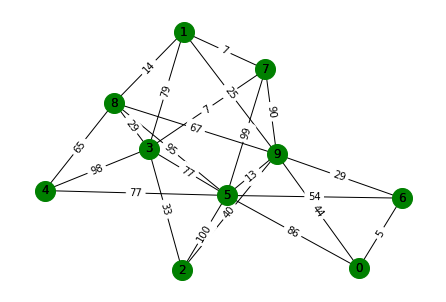

In [433]:
# random.seed(237)
# from random import randint
# G10 = nx.gnp_random_graph(10, 0.5)
# pos = nx.spring_layout(G10)
# nx.draw(G10,pos,node_color='green',node_size=400,with_labels=True)
# nx.draw_networkx_labels(G10, pos)
# nx.set_edge_attributes(G10, {e: {'weight': randint(1, 100)} for e in G10.edges})
# nx.set_node_attributes(G10, {e: {'Energy': 2} for e in G10.nodes})
# labels = nx.get_edge_attributes(G10, 'weight')
# nx.draw_networkx_edge_labels(G10, pos, edge_labels=labels)
# #plt.savefig('/content/gdrive/MyDrive/Networkx/network20.png')
# plt.show()

In [18]:
G10 = nx.read_gml("Graph10.gml")

In [19]:
def AstarEnergyLifetimeInac(Graph, iterations):
    list_nodes = list(Graph.nodes())
    activenodes = list_nodes[1:]
    random.seed(237)
    #S = listnodes[1]
    D = list_nodes[0]
    # This list contains the sum of the transmission energy in all the possible paths
    Ex = []
    Active = []
    ListeEnergy = []
    counter = []
    r = True
    #start = time.time()
    for i_ in range(iterations): #r:
        S = random.choice(activenodes)
        liste = nx.astar_path(Graph, S, D, weight = 'weight' ) 
        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste)):
            if i == 0:
                Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
            elif i!=0 and i!= len(liste) - 1:
                Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']))
        Energysum = sum(Energy)
        for m in range(len(activenodes) - 1):
            if Graph.nodes[activenodes[m]]["Energy"] < 0:
                activenodes.remove(activenodes[m])
                t = len(activenodes)
                #r = False
            else:
                t = len(activenodes)

        ListeEnergy.append(Energysum)
        Active.append((i_,t))
        #counter += 1
        #r = time.time() - start
        #t.append(r) 
        #Ex.append(ListeEnergy)

        #plt.plot(ListeEnergy)
        #plt.show()
    #final = time.time() - start
    return  Active #sum(ListeEnergy) , activenodes, counter, ListeEnergy#, np.mean(ListeEnergy), np.std(ListeEnergy), (np.std(ListeEnergy)/np.mean(ListeEnergy))*100           

In [20]:
G10 = nx.read_gml("Graph10.gml")

In [21]:
x = AstarEnergyLifetimeInac(G10, 50000)

In [22]:
import matplotlib.pyplot as plt

In [23]:
z = np.array(x)
z

array([[    0,     9],
       [    1,     9],
       [    2,     9],
       ...,
       [49997,     1],
       [49998,     1],
       [49999,     1]])

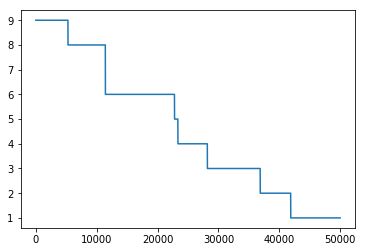

In [24]:
plt.plot(z[:,0], z[:,1])
plt.show()

### Try with 20 nodes

In [25]:
G20 = nx.read_gml("Graph21.gml")

In [26]:
x20A = AstarEnergyLifetimeInac(G20, 70000)

In [27]:
z20A = np.array(x20A)
z20A

array([[    0,    19],
       [    1,    19],
       [    2,    19],
       ...,
       [69997,     7],
       [69998,     7],
       [69999,     7]])

### Inactive Nodes Dijstra

In [28]:
def DijstraEnergyLifetimeInac(Graph, iterations):
    list_nodes = list(Graph.nodes())
    activenodes = list_nodes[1:]
    random.seed(237)
    #S = listnodes[1]
    D = list_nodes[0]
    # This list contains the sum of the transmission energy in all the possible paths
    Ex = []
    Active = []
    counter = 0
    ListeEnergy = []
    #start = time.time()
    for i_ in range(iterations):
        S = random.choice(activenodes)
        liste = nx.single_source_dijkstra(Graph, S, D, weight='weight')[1] 
        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste)):
            if i == 0:
                Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
            elif i!=0 and i!= len(liste) - 1:
                Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']) + ERex)
        Energysum = sum(Energy)
        for m in range(len(activenodes) - 1):
            if Graph.nodes[activenodes[m]]["Energy"] < 0:
                #t = activenodes[j]
                activenodes.remove(activenodes[m])
                t = len(activenodes)
            else: 
                t = len(activenodes)  

        ListeEnergy.append(Energysum)
        Active.append((i_, t))
        #counter += 1
        #r = time.time() - start
        #t.append(r) 
        #Ex.append(ListeEnergy)

        #plt.plot(ListeEnergy)
        #plt.show()
    #final = time.time() - start
    return Active

In [29]:
G10 = nx.read_gml("Graph10.gml")

In [30]:
x1 = DijstraEnergyLifetimeInac(G10, 50000)

In [31]:
z1 = np.array(x1)
z1

array([[    0,     9],
       [    1,     9],
       [    2,     9],
       ...,
       [49997,     1],
       [49998,     1],
       [49999,     1]])

### Try with 20 nodes

In [32]:
G20 = nx.read_gml("Graph21.gml")

In [33]:
x20D = DijstraEnergyLifetimeInac(G20, 70000)

In [34]:
z20D = np.array(x20D)
z20D

array([[    0,    19],
       [    1,    19],
       [    2,    19],
       ...,
       [69997,     7],
       [69998,     7],
       [69999,     7]])

### Inactive Nodes RLDPP

In [35]:

random.seed(237) # l = []
 
def NewEnergyLifetimeInac(Graph, iterations):
    listnodes = list(Graph.nodes())
    activenodes = listnodes[1:]
    Ex = []
    Active = []

    for i_ in range(iterations):
        S = random.choice(activenodes)
        # S = listnodes[1]
        D = listnodes[0]

        paths = nx.all_simple_paths(Graph, source=S, target=D,cutoff=5)
        liste = list(paths)
        x = compute(Graph, liste)[0]
        y = compute(Graph, liste)[1]
        Index = y.index(x)  
        l = liste[Index]

        for i in range(len(l)): # i will go through all the length of one of the possible path

            if i == 0:                   # If the node is the source node, we don't use the ERx

                Graph.nodes[l[i]]["Energy"] -= ETx(Graph[l[i]][l[i + 1]]['weight'])                                             # We update the energy of the source node

            elif i!=0 and i!= len(l) - 1:                                                                                            # If the node is a node situated in the transfer path 

                Graph.nodes[l[i]]["Energy"] = Graph.nodes[l[i]]["Energy"] - ETx(Graph[l[i]][l[i + 1]]['weight']) - ERex   # We update the energy of each node situated in the transfer path

        
        for m in range(len(activenodes) - 1):
            if Graph.nodes[activenodes[m]]["Energy"] < 0:
                activenodes.remove(activenodes[m])
                t = len(activenodes)
            else: 
                t = len(activenodes)  
        Ex.append(x)
        Active.append((i_, t))
        #counter += 1
        #r = time.time() - start
        #t.append(r)
    #final = time.time() - start
    return Active


In [36]:
G10 = nx.read_gml("Graph10.gml")

In [37]:
x2 = NewEnergyLifetimeInac(G10, 50000)

In [38]:
z2 = np.array(x2)
z2

array([[    0,     9],
       [    1,     9],
       [    2,     9],
       ...,
       [49997,     1],
       [49998,     1],
       [49999,     1]])

### Try with 20 nodes

In [39]:
G20 = nx.read_gml("Graph21.gml")

In [40]:
x2M = NewEnergyLifetimeInac(G20, 70000)

In [42]:
z2M = np.array(x2M)
z2M

array([[    0,    19],
       [    1,    19],
       [    2,    19],
       ...,
       [69997,     7],
       [69998,     7],
       [69999,     7]])

### Plot Active sensor nodes for 20 nodes

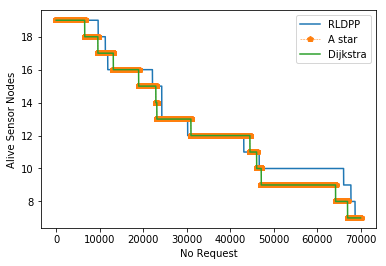

In [43]:
import matplotlib.pyplot as plt
plt.plot(z2M[:,0], z2M[:,1], label='RLDPP')
plt.plot(z20A[:,0], z20A[:,1], 'p',linestyle='dashed',linewidth=0.5, label='A star ')
plt.plot(z20D[:,0], z20D[:,1], label='Dijkstra')
#plt.xlim(0, 150)
plt.xlabel('No Request')
plt.ylabel('Alive Sensor Nodes')
plt.legend()
plt.savefig('ActiveSensornodes20nodes.png')
plt.show()

### Plot Active Sensor nodes for 10 nodes

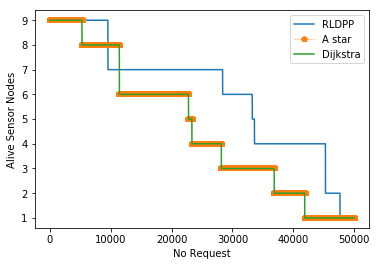

In [44]:
import matplotlib.pyplot as plt
plt.plot(z2[:,0], z2[:,1], label='RLDPP')
plt.plot(z[:,0], z[:,1], 'p',linestyle='dashed',linewidth=0.5, label='A star ')
plt.plot(z1[:,0], z1[:,1], label='Dijkstra')
#plt.xlim(0, 150)
plt.xlabel('No Request')
plt.ylabel('Alive Sensor Nodes')
plt.legend()
plt.savefig('ActiveSensornodes10.png')
plt.show()

### Network Lifetime Curve in requests 

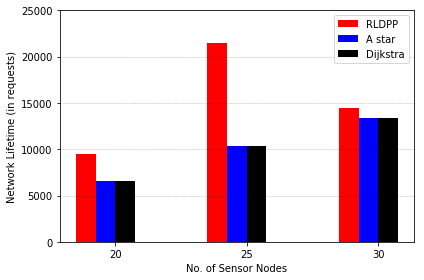

In [41]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[9469, 6550, 6550], [21467, 10388, 10388], 
                 [14444, 13407, 13407]])  ### These values come from the results we obtain up
data_std = np.array([[1, 2, 1], [1, 2, 1], [1, 2, 1]])    

length = len(data)
x_labels = ['20', '25', '30']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.15 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='r', label='RLDPP', yerr=data_std[:,0])
ax.bar(x + width, data[:,1], width, color='b', label='A star', yerr=data_std[:,1])
ax.bar(x + (2 * width), data[:,2], width, color='black', label='Dijkstra', yerr=data_std[:,2])
#ax.bar(x + (3 * width), data[:,3], width, color='#73C2FB', label='PHOENIX', yerr=data_std[:,3])

ax.set_ylabel('Network Lifetime (in requests)')
ax.set_ylim(0,25000)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('No. of Sensor Nodes')
#ax.set_title('Title')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.savefig('Networklifetime.png')
fig.tight_layout()
plt.show()